### Testing of visualization of molecules with respects to descriptors

In [2]:
import pandas as pd
import rdkit as rdkit
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit import *
from rdkit.Chem import PandasTools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.graph_objects as go
import plotly_express as px
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import SimilarityMaps


import os
path = "data/"
os.chdir(path)

C:\Users\meide\.conda\envs\rdkit\lib\site-packages\rdkit\Chem\Draw\__init__.py:413: RuntimeWarning: invalid value encountered in multiply
  Z += Zp * weights[i]
C:\Users\meide\.conda\envs\rdkit\lib\site-packages\matplotlib\contour.py:1486: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\meide\.conda\envs\rdkit\lib\site-packages\matplotlib\contour.py:1487: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\meide\.conda\envs\rdkit\lib\site-packages\rdkit\Chem\Draw\SimilarityMaps.py:228: UserWarning: No contour levels were found within the data range.
  contourset = fig.axes[0].contour(x, y, z, contourLines, colors=colors, alpha=alpha, **kwargs)
C:\Users\meide\.conda\envs\rdkit\lib\site-packages\rdkit\Chem\Draw\SimilarityMaps.py:228: UserWarning: The following kwargs were not used by contour: 'colormap'
  contourset = fig.axes[0].contour(x, y, z, contourLines, colors=colors, alpha=alpha, **kwargs)

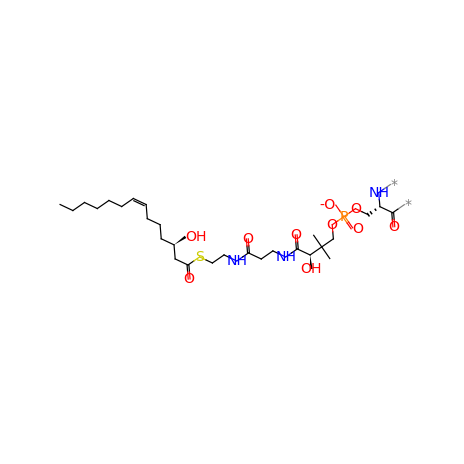

In [3]:
mol = Chem.MolFromSmiles('CCCCCC/C=C\CCC[C@@H](O)CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)([O-])OC[C@H](N[*])C([*])=O')

AllChem.ComputeGasteigerCharges(mol)


contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]


fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colormap="jet", contourLines =10)

In [4]:
# df = pd.read_csv("chemical_descriptors.csv")
df = pd.read_csv("Calc.csv")

In [5]:
mol_list = []

for i in df.InChI:
    mol = Chem.MolFromInchi(i)
    mol_list.append(mol)

[12:09:24] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number, Number; Charge(s): Do not match)



In [6]:
mol2 = mol_list[7]
AllChem.ComputeGasteigerCharges(mol2)



In [7]:
contribs2 = [mol2.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol2.GetNumAtoms())]

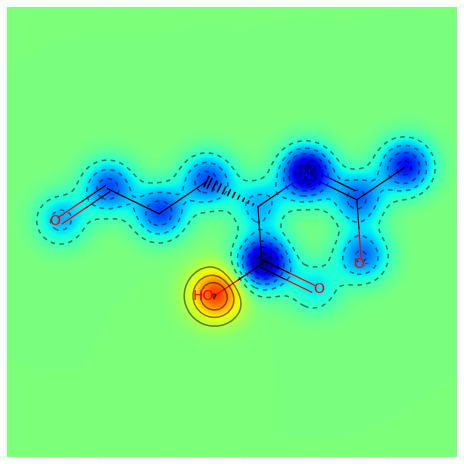

In [9]:
mol2 = mol_list[7]
AllChem.ComputeGasteigerCharges(mol2)
contribs2 = [mol2.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol2.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol2, contribs, colorMap='jet', contourLines=10)

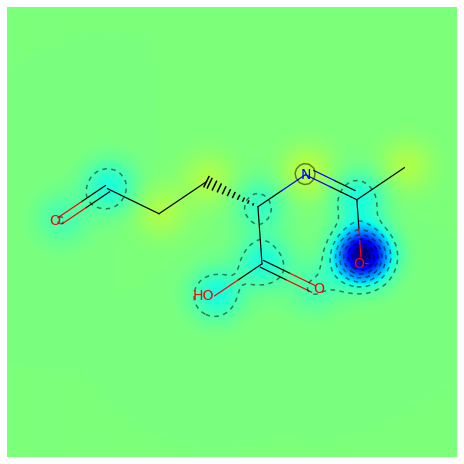

In [10]:
from rdkit.Chem import rdMolDescriptors
contribs2 = rdMolDescriptors._CalcCrippenContribs(mol2)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol2,[x for x,y in contribs2], colorMap='jet', contourLines=10)

In [39]:
rdMolDescriptors.CalcCrippenDescriptors

AttributeError: module 'rdkit.Chem.rdMolDescriptors' has no attribute '_descList'